# <div>Tutorial 7 - measuring classifier performace </div>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

from sklearn import metrics

## <div dir=rtl> שאלה 0</div>

<div dir=rtl>
    ב. בתרגול קודם הכרנו את כלל הפיצ'רים בדאטא סט והתרשמנו כי לחץ הדם הסיסטולי ולחץ הדם הדיאסטולי מהווים מדדים המפרידים במידה מסוימת בין המטופלים החולים והבריאים. <br />
    בתרגול הקודם התאמנו מודל לוגיסטי לכל הנתונים יחד וחישבנו את מדד הדיוק <br /></div>
<br />

\begin{align}
Accuracy = \frac{TP+TN}{TP+TN+FP+FN}\\
\end{align}
<br />

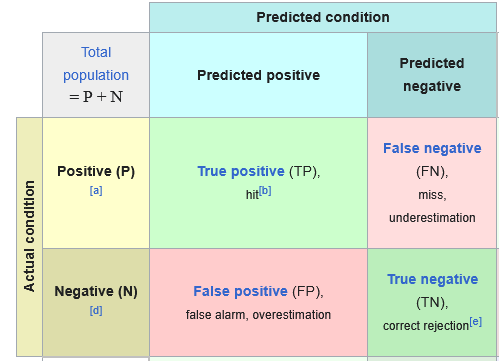

<div dir=rtl>
    אפשר להראות שהפרדה גם בעזרת שני פיצ׳רים לא כל כך אינפורמטיבים (BMI ודופק) עדיין נותנת ציון דיוק גבוה, מעל 0.8. 
    <br />
    למה זה קורה?
     <br /> --------------------------------
      <br /> 
    ננסה להבין זאת ע״י דוגמה - נניח שיש לנו דאטה סט שמכיל 1000 תצפיות שמסומנות כ-0 ו10 תצפיות שמסומנת כ-1. <br />
    בנוסף נניח שיש לנו מודל קלאסיפיקציה ״מנוון״, כלומר לכל התצפיות המודל נותן את הפרדיקציה 0. מה יהיה ציון הדיוק?
</div>

In [3]:
y_true = np.concatenate((np.zeros(1000), np.ones(10)))
y_pred = np.zeros(y_true.shape[0])

metrics.accuracy_score(y_true, y_pred)

0.9900990099009901

<div dir=rtl>
    אבל המודל הזה ממש לא מודל טוב....אם נשים לב במודל הגרוע ביותר אנחנו נקבל שמדד הדיוק שווה ליחס בין כמות התצפיות של הקבוצה הגדולה ביותר לכל הדאטה סט - הTN תמיד יהיה מספר מאוד גדול! כי הדאטה ממש לא מאוזן <br />
    נתבונן בעוד שני מדדי דיוק - <code>precision</code> ו - <code>recall</code>
</div>
<br />

\begin{align}
Precision = \frac{TP}{TP+FP}\\
    Recall = \frac{TP}{TP+FN}\\
\end{align}
<br />
<div dir=rtl>
    מדד ה- <code>precision</code> מתאר כמה המודל מסווג בצורה אמינה דוגמאות למחלקה החיובית (1) כלומר כמה תצפיות מתוך כל התצפיות שהכרזנו עליהן כחיוביות אכן חיוביות<br />
    מדד ה- <code>recall</code>, ידוע גם כ sensitivity מתאר כמה המודל מצליח לסווג נכונה את המחלקה החיובית מתוך סך כל ההופעות שלה בדאטה. 
</div>

In [4]:
print(metrics.precision_score(y_true, y_pred))
print(metrics.recall_score(y_true, y_pred))


0.0
0.0


c:\Users\alexf\Documents\teaching\DS2023\tutorials\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


<div dir=rtl>

מ-99 ל-0 זה די מרשים. 
</br>
שימו לב שהמדדים שלנו הם אסימטרים - מסתכלים על "גילוי" של החיובי.

אפשר להגדיר מדדים מקבילים עבור התוצאה השלילית, 
</br>
ואלו כמובן יהיו גבוהים פה (ה"רגישות" לגילוי ה"תוצאה השלילית" היא מושלמת)

</div>


In [5]:
print(metrics.classification_report(y_true, y_pred))

              precision    recall  f1-score   support

         0.0       0.99      1.00      1.00      1000
         1.0       0.00      0.00      0.00        10

    accuracy                           0.99      1010
   macro avg       0.50      0.50      0.50      1010
weighted avg       0.98      0.99      0.99      1010



c:\Users\alexf\Documents\teaching\DS2023\tutorials\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\alexf\Documents\teaching\DS2023\tutorials\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\alexf\Documents\teaching\DS2023\tutorials\.venv\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(avera

<div dir=rtl>
דרך נוספת להביט בתוצאות היא למפות את כל "מטריצת הבלבול" שמפלחת את הנקודות ע"פ מה המודל חזה (עמודות) ומה נכון באמת (שורות). שימו לב שהיא מוגדרת גם עבור מסווגים קטגוריים (לא-בינאריים - N מחלקות ובהתאם מטרייצת בלבול NXN) בניגוד לכל שאר החלקים של תרגול זה שמתרכז בבעיות עם שתי מחלקות בלבד - חיובית ושלילית, כלומר סיווג בינארי

במושגים של מטריצת הבלבול, ה"דיוק" בוחן באופן פשטני את משקל האלכסון (זיהויים נכונים) מול כלל המטריצה, וזה נהיה בעייתי כשיש חוזר איזון במשקל של עמודות שונות
</div>

Text(-4.277777777777779, 0.5, 'Target')

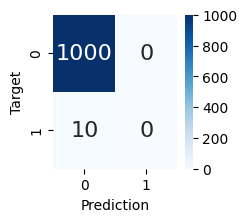

In [12]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
mat = confusion_matrix(y_true, y_pred, labels=[0,1])
plt.figure(figsize=(2,2))
sns.heatmap(mat, annot=True, annot_kws={"size": 16}, fmt="d", cmap='Blues')
plt.xlabel('Prediction')
plt.ylabel('Target')



<div dir=rtl>
</br>
כעת נעמיק בהבנת מטריקות הביצועים של מסווגים **בינאריים** בסיוע אנימציה

</div>

-----------------------------------------------------------------------------------------------------------------------------------

<br/> Courtesy of: 
https://paulvanderlaken.com/2019/08/16/roc-auc-precision-and-recall-visually-explained/
</br>
</br>
TP/("Predicted Positive") = TP/(TP+FP) = **Precision**
</br>
</br>
TP/("Ground-truth Positive") = TP/(TP+FN) = **Recall = Sensitivity = TPR** (True Positive Rate)
</br>
</br>
FP/("Ground-truth Negative") = FP/(TN+FP) = **FPR** (False Positive Rate) = 1 - **TNR** = 1 - Specificity
</br>
</br>
NOTE: we CAN trade-off between the two by **moving the threshold**
</br>
One end is low FPR,TPR (focus on precision) the other is high FPR,TPR (focus on recall)
</br>
Can be tuned according to the application (e.g., capacity to handle false alarms)
</br>
</br>
</br>
![ROC gif](https://github.com/dariyasydykova/open_projects/raw/master/ROC_animation/animations/cutoff.gif)

There are no free lunches though so we can't have both, unless data gives perfect separation. 
</br>
To get a SINGLE number quantifying how good is our classifier (independent of threshold choice), 
</br>
it's customary to compute the AUC - Area Under the TPR-vs.-FPR Curve, known as ROC (Receiver Operating Characteristic) curve
</br>
</br>
![GifUrl](https://paulvanderlaken.com/wp-content/uploads/2019/08/roc.gif?w=800&h=400&crop=1)
</br>
</br>
</br>
Same can be done with precision-recall space, then the curve is pushed to North-East (vs. North-West with FPR/TPR) as the classifier improves.  
</br> This is called PRC (precision-recall curve), and might be more appropriate for unbalanced datasets (Why?)
</br>
</br>

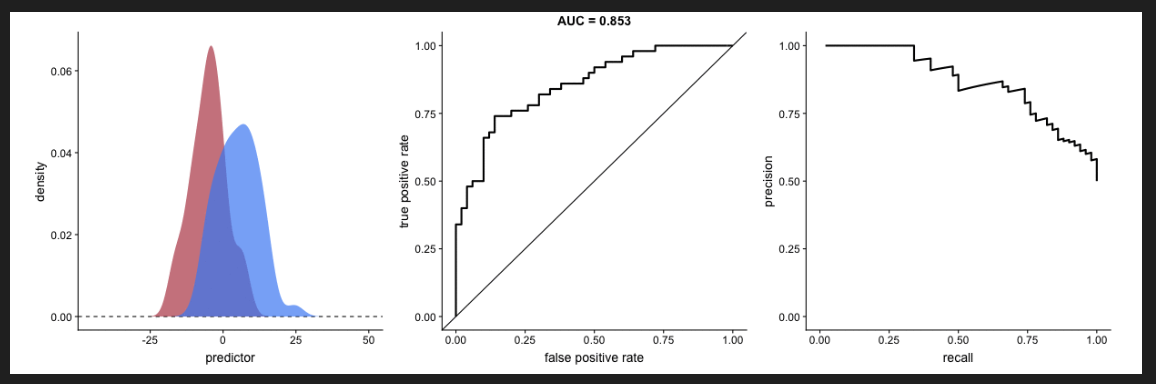

There are many other metrics but here we require to memorize the highlighted ones:

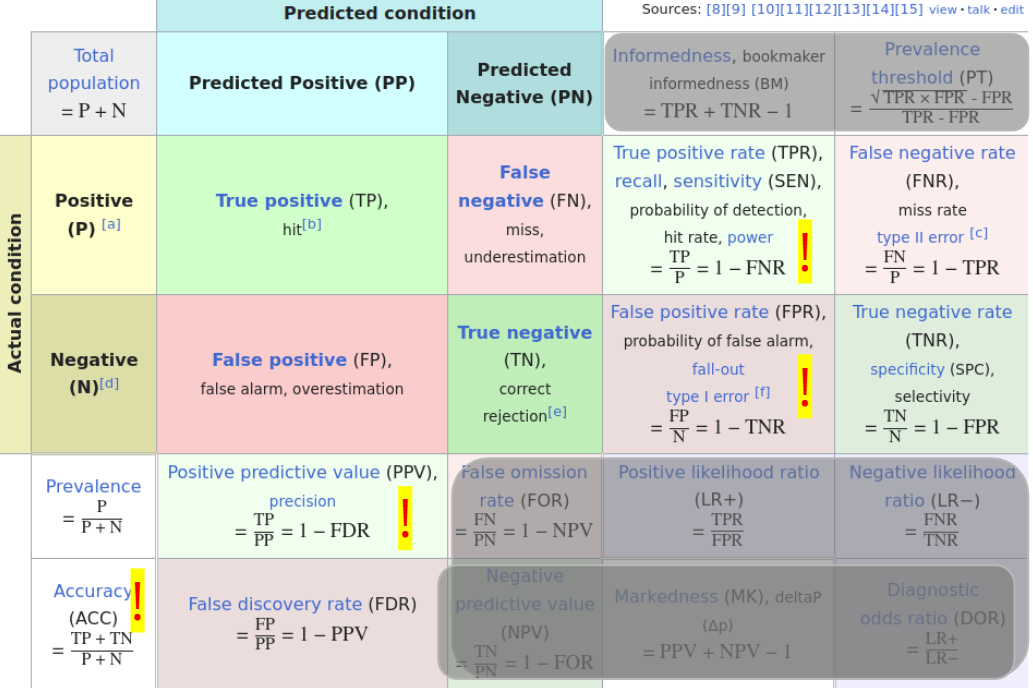


## <div dir=rtl> שאלה 1 - 2024 מועד א</div>

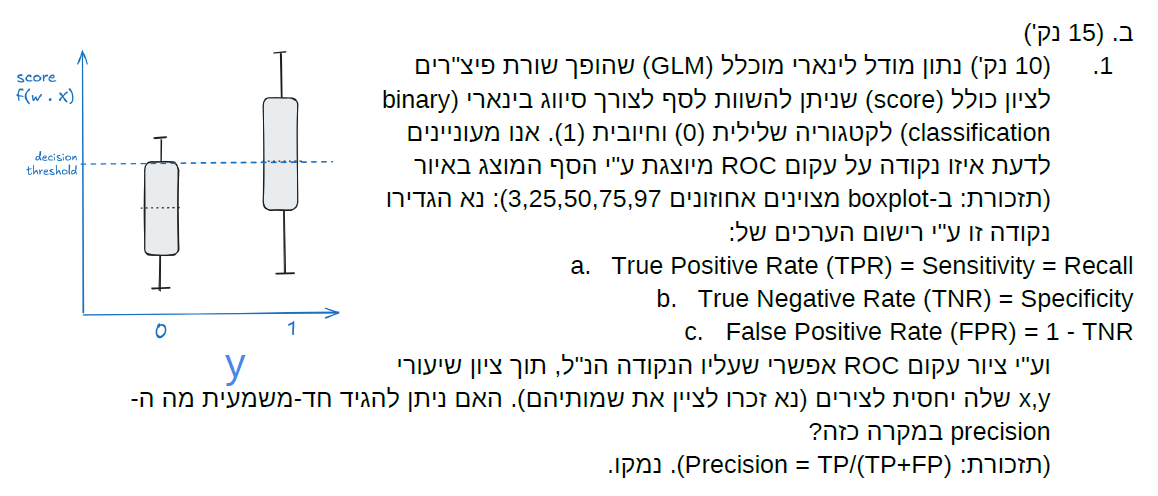

## <div dir=rtl>שאלה 2</div>

<div dir=rtl>
    בשנת 2008 פרסם הNIH האמריקאי מידע על אודות 4238 תושבי העיר פארמינגהם במדינת מסצ'וסטס. <br />
    המידע כלל נתונים על בריאותם של המשתתפים במחקר והאם בתוך עשור המשתתפים זוהו כסובלים ממחלות בכלי הדם הכליליים בלב. המידע זמין בקובץ heart_disease.csv. <br />
</div>
<div dir=rtl style='background-color:rgb(71, 68, 68);'> 
    הערה: הדאטאסט אמיתי וניתן להורדה בצורה חופשית. הנתונים בו שונו לצורך הדוגמה. <br />
</div><br />
<div dir=rtl>
    א. טענו את הקובץ לאובייקט מסוג DataFrame.
</div>

In [68]:
# update matplotlib params for convenience
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (10, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large',
         'axes.grid':True,
         'axes.grid.which':'both'
         }

plt.rcParams.update(params)

In [69]:
df = pd.read_csv('heart_disease.csv')
df.sample(5)

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
1512,0,63,1.0,0,0.0,0.0,0,0,0,222.0,186.0,78.0,16.92,65.0,74.0,1
3431,1,44,2.0,0,0.0,0.0,0,0,0,210.0,133.0,85.5,25.14,75.0,90.0,0
4186,0,49,3.0,1,8.0,0.0,0,0,0,215.0,106.0,63.0,19.22,60.0,66.0,0
674,1,38,1.0,1,15.0,0.0,0,0,0,220.0,119.5,85.5,31.39,70.0,85.0,0
1952,1,59,4.0,0,0.0,0.0,0,0,0,210.0,174.0,84.0,25.64,58.0,77.0,1


<div dir=rtl>
אוקיי חזרה לנתונים שלנו, נריץ שוב פיט של רגרסיה לוגיסטית, הפעם עם חבילת sklearn

</div>

              precision    recall  f1-score   support

           0       0.97      0.97      0.97      3594
           1       0.86      0.84      0.85       644

    accuracy                           0.95      4238
   macro avg       0.91      0.91      0.91      4238
weighted avg       0.95      0.95      0.95      4238



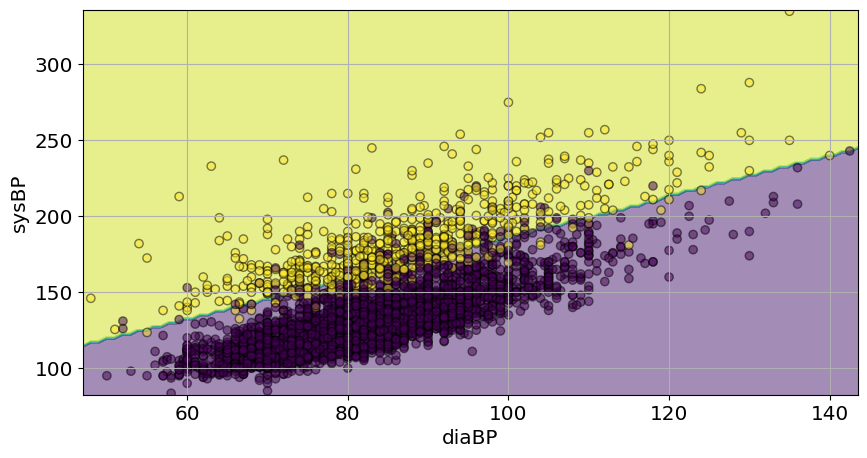

In [70]:
from sklearn.linear_model import LogisticRegression
from sklearn.inspection import DecisionBoundaryDisplay

selected_columns = ['diaBP','sysBP']
target_column = 'TenYearCHD'
y_true = df[target_column]
LRmodel = LogisticRegression()
LRmodel.fit(df[selected_columns], df[target_column])

y_pred = df['TenYearCHD_pred'] = LRmodel.predict(df[selected_columns])
print(metrics.classification_report(y_true, y_pred))

disp = DecisionBoundaryDisplay.from_estimator(
    LRmodel, df[selected_columns], response_method="predict",
    xlabel=selected_columns[0], ylabel=selected_columns[1], alpha=0.5,
)
disp.ax_.scatter(df['diaBP'], df['sysBP'], c=df['TenYearCHD'], edgecolor="k",  alpha=0.5)

## !!!!!!!!!!!!!!!!!!! 

# What does is mean to "fit"? what parameters did the model training look for? 
# Let's look under the hood 

# Let's extract the weights vector and the intercept 
w, b = LRmodel.coef_[0], LRmodel.intercept_[0]

# What is the angle between the weights vector and the decision boundary?
# Think what it should be then uncomment the below to find out 
# plt.arrow(
#     100, 100, 
#     *(w*100), 
#     head_width=5, head_length=10, fc='blue', ec='blue'
# )

# # # Why ain't the angle like what you expected? try to also uncomment the below
# # plt.gca().set_aspect('equal')


<div dir=rtl>

מה חסר בסיפור הזה?

 מה אם אני רוצה להגדיל את הרגישות על חשבון הספציפיות כי אני מוכן לספוג יותר התרעות שווא?

לצורך כך נבחן את האינטואיציה שמאחורי בחירת סף הסתברות של 0.5 ונגלה שהיא מניחה: 

א. דאטה מאוזן

ב. עלות שגיאה שווה לשגיאות משני הסוגים

ניתן לנתח מתמטית מה האופטימום בהנתן מידע מדויק על הסטיות מהנ"ל אבל לרוב אין מידע כזה, ואנחנו נבחן אמפירית מה קורה כשמזיזים את הסף. בכל המסווגים הליניאריים זה קל - מזיזים את משטח ההפרדה בניצב כלומר לאורך וקטור המשקולות. בכל המסווגים המספקים מדד הסתברות שנע בין 0 ל-1 זה גם קל - כשהכל עובר דרך מדד מחושב אחד אפשר לשנות את הסף שמשווים את המדד אליו. רגרסיה לוגיסטית היא גם וגם

 בשורה התחתונה, המודל שבחרנו יודע לפנק אותנו במדד  מספרי (ואפילו בעל משמעות של הסתברות) בעזרת predict_proba 
 ולכן ניתן ליצור ממנו רצף של כללי החלטה 

</div>

              precision    recall  f1-score   support

           0       1.00      0.92      0.96      3594
           1       0.70      0.99      0.82       644

    accuracy                           0.93      4238
   macro avg       0.85      0.96      0.89      4238
weighted avg       0.95      0.93      0.94      4238



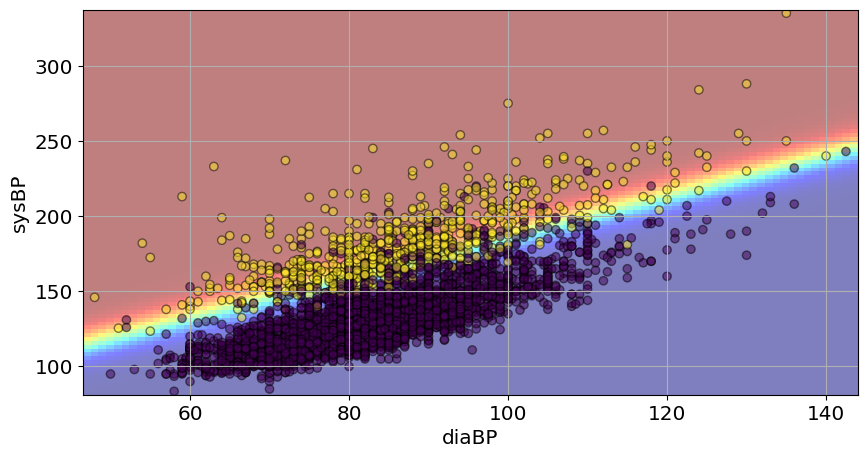

In [ ]:
disp = DecisionBoundaryDisplay.from_estimator(
    LRmodel, df[selected_columns], response_method="predict_proba", # ! note function name.
    xlabel='diaBP', ylabel='sysBP', alpha=0.5, cmap='jet', plot_method='pcolormesh'
)
disp.ax_.scatter(df['diaBP'], df['sysBP'], c=y_true, edgecolor="k",  alpha=0.5)

# !! Create a custom decision rule (e.g. high-recall lower-precision) 
#    from the already trained classifier 
threshold = 0.1
y_pred = LRmodel.predict_proba(df[selected_columns])[:, 1] > threshold
######
print(metrics.classification_report(y_true, y_pred))

# !!!
# Why doesn't the plot change with the threshold?!  
# Try to uncomment the below 
# plt.figure()
# plt.scatter(df['diaBP'], df['sysBP'], c=y_pred)

<div dir=rtl>
שימו לב שכאשר משנים את הסף, משטח ההפרדה זז אך נשאר ניצב לוקטור כיוון השינוי

אם ננסה את כל ערכי הסף (בקפיצות קטנות) נוכל לאפיין את המסווג באופן מלא, כלומר את כל כללי ההחלטה שיכולים להגזר ממנו ע"י שינוי סף בודד וללא אימון מחדש. 

בכל ערך של סף נחשב את כל מדדי הביצוע ונוכל לצייר את השתנותם אחד כנגד השני. ישנן שתי עקומות שמקובל לצייר:

1. Recall-vs-Precision curve (RPC) 
1. TPR-vs.-FPR aka sensitivity-vs.-specificity aka Receiver Operating Characteristic (ROC) 

</div>

Text(0.5, 1.0, 'PRC curve')

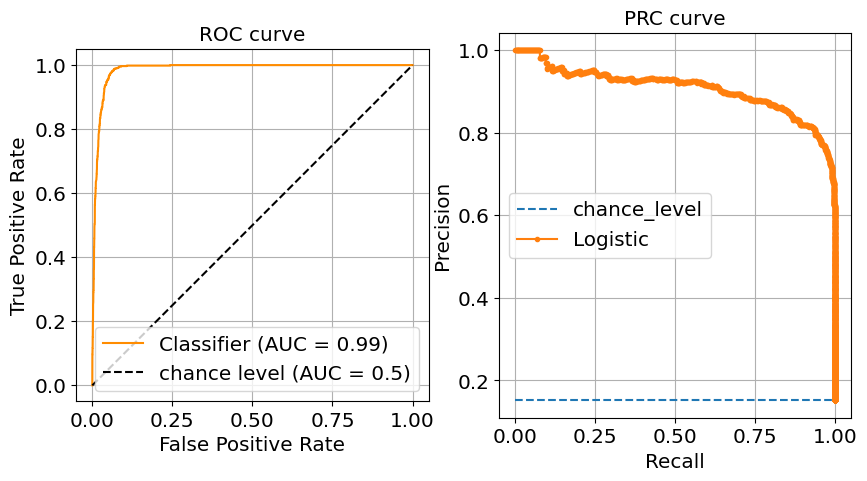

In [72]:
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay, precision_recall_curve, roc_auc_score

predictions_prob = LRmodel.predict_proba(df[selected_columns])

plt.figure()
ax1=plt.subplot(1,2,1)
RocCurveDisplay.from_predictions(df['TenYearCHD'], predictions_prob[:, 1], color="darkorange", ax=ax1)
plt.plot([0, 1], [0, 1], "k--", label="chance level (AUC = 0.5)")
plt.xlabel("False Positive Rate"); plt.ylabel("True Positive Rate")
plt.title("ROC curve"); plt.axis("square"); plt.legend()

plt.subplot(1,2,2)
precision, recall, th = precision_recall_curve(df['TenYearCHD'], predictions_prob[:,1])
chance_level = len(df.loc[df['TenYearCHD']==1]) / len(df)
plt.plot([0, 1], [chance_level, chance_level], linestyle='--', label='chance_level')
plt.plot(recall, precision, marker='.', label='Logistic')
plt.xlabel('Recall'); plt.ylabel('Precision'); plt.legend(); 
plt.title('PRC curve')

<div dir=rtl>
זה גם מאפשר לסכם את חקר הביצועים שלנו במספר אחד, השטח מתחת, ש(לכאורה) תופס את כל התמונה  

למה אנחנו מתעקשים?  כדי שנוכל בקלות ובהוגנות, להשוות מסווגים שונים ולבחור את הטוב ביותר 

למשל, בהמשך נכיר סוג מסווג אלטרנטיבי, Support Vector Machine, ונרצה להשוות אותו לרגרסיה לוגיסטית,

באופן הכי פרקטי, ייתכן שהמשתמש (הרופא?) יקבל "חוגה" כדי לכוון את הסף בהתאם לביצועים בשטח, כך שאיננו יודעים מראש מה תהיה "נקודת העבודה" בפועל


</div>

In [73]:
roc_auc = roc_auc_score(y_true, predictions_prob[:, 1])
f"Area-Under-Curve (AUC): {roc_auc:.3f}"


'Area-Under-Curve (AUC): 0.986'

<div dir=rtl>
האם מצבנו כה מושלם? איפה בכל זאת שיקרנו? 

<br/>
<br/>

לא בדקנו את עצמנו כנגד התאמת-יתר (overfit)!!

 חייבים לבדוק על דאטא נפרד!!

</div>

<div dir=rtl>
         ב. בדקו האם הדאטה מאוזן או לא 
</div>

C:\Users\alexf\AppData\Local\Temp\ipykernel_41868\2354673709.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['TenYearCHD'], palette='coolwarm')


<Axes: xlabel='TenYearCHD', ylabel='count'>

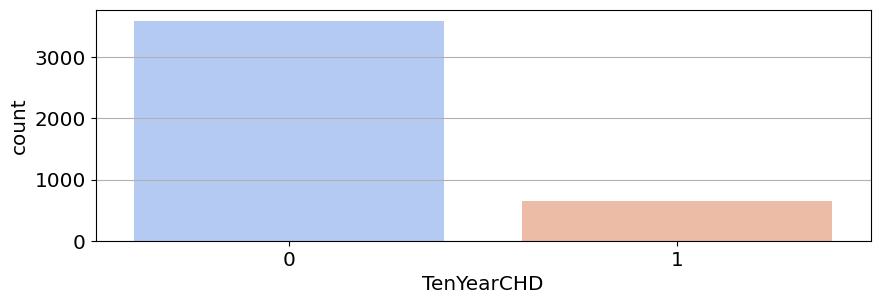

In [74]:
plt.figure(figsize=(10,3))
sns.countplot(x=df['TenYearCHD'], palette='coolwarm')
# shorter but the same as df['TenYearCHD'].value_counts().plot(kind='bar')


<div dir=rtl>
    ג. צרו חלוקה ברשומות כך שבקבוצה אחת יפלו 80% מהדוגמאות, ושאר הדוגמאות בקבוצה השניה. שימו לב שעליכם לחלק את הרשומות כך שהתפלגות המחלקות תישאר זהה בכל קבוצה.
</div>
<br />

<div dir=rtl>
    ראשית ננסה להבין מה התפלגות המחלקות בנתונים:
</div>

In [75]:
pd.DataFrame(
    df['TenYearCHD'].value_counts(normalize=True)
)

,proportion
TenYearCHD,
0,0.848042
1,0.151958


<div dir=rtl>
    קבלנו שרוב הנתונים מגיעים מנבדקים בריאים - יש הטייה חזקה בדאטא לטובת המחלקה הזו.
    </br>
     נשים לב שאם נבחר באקראי רשומות לכל קבוצה (אנחנו רוצים שתי קבוצות) החלוקה עלולה להיות כזו שמחלקה אחת תהיה מיוצגת בצורה לא טובה - או בייצוג חסר או בייצוג יתר. 
     </br>
     אנחנו רוצים לדאוג לכך שגם אחרי החלוקה לשתי קבוצות ההתפלגות תישמר 85-15.
    <br />
    אמנם ניתן לממש זאת בעצמינו, אבל למזלינו מימוש מוכן ובדוק כבר קיים:
</div>

In [76]:
from sklearn.model_selection import train_test_split

x_train, x_val = train_test_split(
    df[['sysBP','diaBP', 'TenYearCHD']],
    train_size=0.8,
    stratify=df['TenYearCHD']
)
pd.DataFrame(x_train['TenYearCHD'].value_counts(normalize=True)),\
pd.DataFrame(x_val['TenYearCHD'].value_counts(normalize=True))

(            proportion
 TenYearCHD            
 0             0.848083
 1             0.151917,
             proportion
 TenYearCHD            
 0             0.847877
 1             0.152123)

<div dir=rtl>
    נשים לב לפרמטר stratify (מאנגלית: סטרטיפיקציה - יצרת שכבות). 
    הוא מנחה את הפונקציה לחלק את הנתונים תוך שימור אחוזי החיוביים\שליליים של הדאטה המקורי, בעזרת הלייבלים הנתונים לו.
    </br>
     אכן בהסתכלות על ההתפלגות בכל קבוצה - מקבלים שהתפלגות הלייבלים נשמרה כמו במקור בדיוק גבוה.
</div>

---------------------------------------------------------------------------------------------------------------------------------------------
<br />
<div dir=rtl>
    ד. צרו מודל לינארי לסיווג הנתונים לשתי מחלקות אשר ממקסם את המרחק בין שתי המחלקות והישר המפריד. 
    
    יש ללמוד מהקבוצה הגדולה (זו שסומנה ב train)
</div>
<br />
<br />
<div dir=rtl>
    זאת הגישה במסווג שנקרא Support Vector Machine. <br />
    מדובר במודל אשר מתאים מפריד לינארי (קו ישר, מישור או מישור במימד גבוה) ואך ורק לינארי. בתהליך האימון המודל מתחשב במרחק בין הישר המפריד לדוגמאות הקרובות ביותר אליו מכל מחלקה (אלה ווקטורי התמך) ומעביר את הישר בניהם.    את שתי המחלקות נסמן כ +-1 והמטרה שלנו היא למצוא ישר או מישור שמפריד בצורה הטובה ביותר את הנקודות של שתי המחלקות. <br />
    כלומר, בסימונים של +-1, נרצה שהפרדיקציות יהיו בעלות אותו הסימן כמו התיוג , ורצוי גם עם "ספייר"
</div>

\begin{align}
y_i \in \{-1,1\} \\
y_i(w^T \cdot x_i - b) ֿ\geq 1\\\forall i, 1 \leq i \leq n\\
\end{align}

<br /><br />

<div dir=rtl>
מדענית נתונים צעירה החליטה לאמן מסווג ליעד הנ"ל ע"י פונקציית הפסד שהיא אינסופית עבור של כל שגיאה. מה לדעתכם קרה לאלגוריתם הלימוד שלה על דאטה אמיתי, הוא התכנס? 
<br /><br />
---------------------
<br /><br />
    הבעיה בדוגמה הזו היא שהדאטה לא תמיד יהיה ניתן להפרדה מושלמת ע״י קו לינארי. בשביל לאפשר יותר גמישות באלגוריתם נסתמך על soft-SVM שמאפשר סטייה מההפרדה הלינארית המושלמת ובעצם ״מעניש״ במתינות נקודות שמעבר לקו.    הפונקציה שנשתמש בה במקרה זה נקראת גם <code>hinge loss</code> והיא מקבלת את הערך 0 כאשר הנקודה נמצאת בצד הנכון של הישר, אחרת ערך הפרופורציונאלי למרחק של הנקודה מהישר
</div>

\begin{align}
l_i = \max(0, 1 - y_i(w^T \cdot x_i - b))\\
L = \dfrac{1}{n} \sum_{n} l_n + \lambda \cdot ||w||^2
\end{align}

<div dir=rtl>
    בגרף מימין - פונקצית ה hinge loss. בירוק - פונקצית ה 0-1 loss.   ציר ה-x מתאר את המרחק מגבול ההחלטה, כאשר x שלילי מדובר בתצפית שנפלה בצד הלא נכון של הקו ולכן ה loss עבורה יהיה גבוה.

</div>





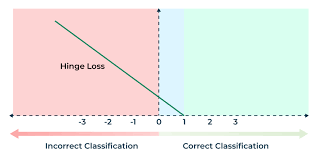  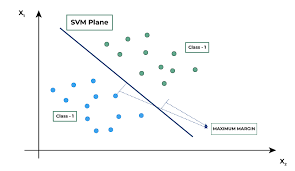 

<div dir=rtl>
    הפרמטר לאמבדה מגדיר את גודל הרגולריזציה, וכך עשוי להשפיע על טיב ההתאמה בסט אימון מול יכולת לעבור לסט מבחן. זהו נושא שנדבר עליו בהרחבה בהמשך, כרגע לענייננו זה היפר-פרמטר שאנחנו חופשיים לבחור, ובהנתן דאטה לא גדול מדיי נרצה לבחון *אמפירית* מה הערך שלו שייתן לנו תוצאות הכי טובות
</div>


<div dir=rtl>
נביט שוב על פונאציאל הדאטה שלנו לפני שמאמנים מסווג 

    צרו תרשים פיזור של שני הפיצ׳רים: sysBP, diaBP
</div>


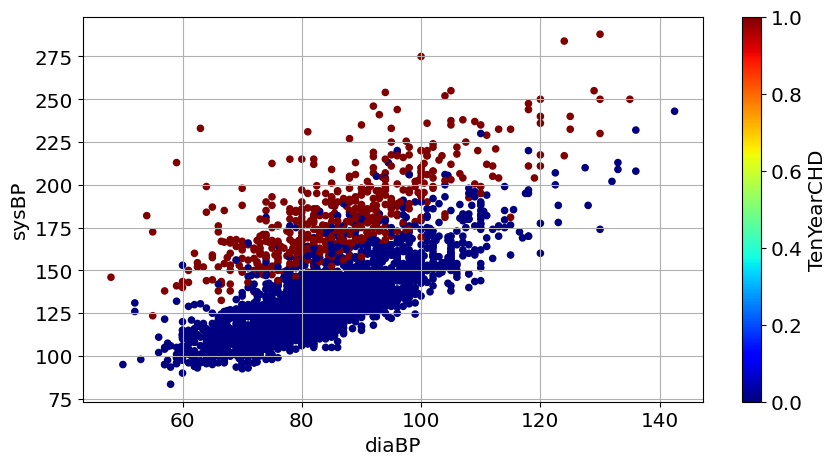

In [77]:
boxp = x_train[['sysBP','diaBP','TenYearCHD']].plot.scatter(
    x='diaBP',
    y='sysBP',
    c='TenYearCHD',
    cmap='jet',
    sharex=False
)

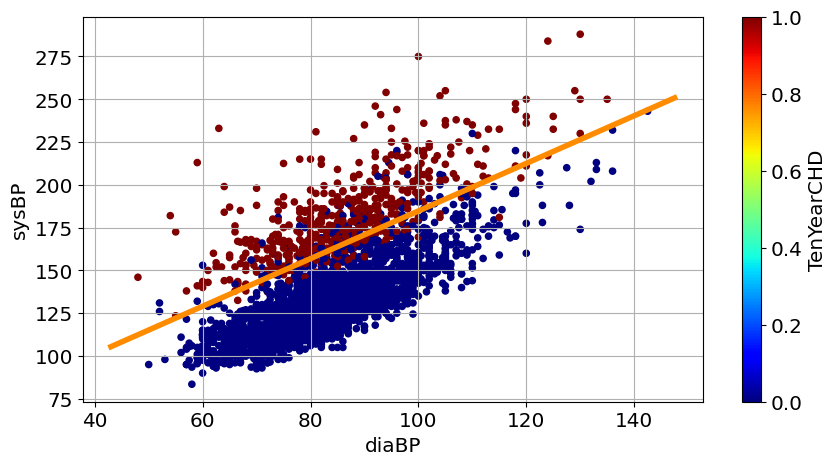

In [78]:
# fit SVM for classification
from sklearn.svm import SVC  # 

svc = SVC(kernel='linear')
svc.fit(
    x_train[['diaBP','sysBP']], 
    x_train['TenYearCHD']
)

boxp = x_train[['sysBP','diaBP','TenYearCHD']].plot.scatter(
    x='diaBP',
    y='sysBP',
    c='TenYearCHD',
    cmap='jet',
    sharex=False
)

def decision_boundary_plot(results, min_x, max_x):
    # get the separating hyperplane
    w = results.coef_[0]
    a = -w[0] / w[1]
    xx = np.linspace(min_x - 5, max_x + 5)  # make sure the line is long enough
    yy = a * xx - (results.intercept_[0]) / w[1]
    plt.plot(xx, yy, c='darkorange', lw=4)

decision_boundary_plot(svc, x_train['diaBP'].min(), x_train['diaBP'].max())

<div dir=rtl>
    ה. בחנו את ביצועי המודל הן על הקבוצת האימון והן על קבוצת הוולידציה.
</div>

In [79]:
metrics.accuracy_score(
    x_train['TenYearCHD'],
    svc.predict(x_train[['diaBP','sysBP']])
)

0.9542772861356932

In [80]:
metrics.accuracy_score(
    x_val['TenYearCHD'],
    svc.predict(x_val[['diaBP','sysBP']])
)

0.9540094339622641

<div dir=rtl>
    באופן צפוי - קיבלנו ביצועים פחות טובים על קבוצת הוולידציה מאשר על קבוצת האימון.
    הבדל קטן ויכולה גם להתהפך בקלות עבור דאטה קטן. בכל אופן נרצה להוריד כמה שיותר את התלות באקראיות ולהבין לעומק את אמינות הביצועים שאנחנו מקבלים על דאטה קטן לפני שפורסים את מסווג העל שלנו בכל המחלקות של ב"ח שיבא
    <br />
</div>
<br />
<div dir=rtl>
    ו. חיזרו על התהליך.
</div>

In [81]:
x_train, x_val = train_test_split(
    df[['sysBP','diaBP', 'TenYearCHD']],
    train_size=0.8,
    stratify=df['TenYearCHD']
)

svc = SVC(kernel='linear')
svc.fit(
    x_train[['diaBP','sysBP']], 
    x_train['TenYearCHD']
)

metrics.accuracy_score(
    x_val['TenYearCHD'],
    svc.predict(x_val[['diaBP','sysBP']])
)

0.9587264150943396

<div dir=rtl>
    למעשה אנחנו רואים שבחלוקות חוזרות ונשנות של הדאטא מקבלים נתונים שונים. נשאלות כעת השאלות: איך נבחר את הפרמטרים האופטימליים של המודל בצורה אמינה? על אילו נתונים נדווח?
</div>
<br />
<br />
<div dir=rtl>
    ז. חלקו את הנתונים לחמש חלוקות 80-20 ייחודיות וזרות אחת לשניה ואמנו מודל על כל חלוקה. ביחרו על בסיס זה את חוזק הרגולריזציה.
</div>
<br />
<div dir=rtl>
    כעת נכיר את מושג הקרוס-וולידציה. בשיטה זה משתמשים בכל הדאטא לאימון (למעט קבוצת מבחן בה לא נוגעים עד השלב האחרון). בכל סבב מאמנים מודל אחר ובודקים את התוצאות שלו.
    <br />
    קרוס וולידציה היא צורה אמינה יותר לדיווח על תוצאות משום שמבטלת את החלוקה כגורם המשפיע על המודל.
    <br />
    אמנם לא מסובך לממש זאת בעצמינו, אבל למזלינו קיים מימוש מוכן ובדוק.
</div>

![](https://scikit-learn.org/stable/_images/grid_search_cross_validation.png)

In [82]:
from sklearn.model_selection import cross_val_score, StratifiedKFold

skf = StratifiedKFold(n_splits=5)

svc = SVC(kernel='linear')
scores = cross_val_score(
    svc,
    df[['sysBP', 'diaBP']],
    df['TenYearCHD'],
    cv=skf
)
scores

array([0.95518868, 0.9504717 , 0.95165094, 0.95041322, 0.96458087])

<div dir=rtl>
    נשים לב למעלה שקיבלנו 5 מספרים - חמישה ערכי דיוק. עוד נשים לב שהמודל בו אנחנו משתמשים, svc, הוא מודל שהחבילה "יודעת" לעבוד איתו, לכן התהליך כולו אוטומטי.
    <br />
    כעת, תוך שימוש בשיטה הזו נבחר פרמטר C מתאים:
</div>

In [83]:
regularization_strength = [1e-5, 1e-4, 1e-3 ,0.01, 0.1, 1]

results = pd.DataFrame(
    [],
    columns=regularization_strength
)
# NOTE: the cross_val_score() function implicitly runs fit() multiple times
#       (Why? TODO read documentation)

for strength in regularization_strength:
    skf = StratifiedKFold(n_splits=5)
    svc = SVC(kernel='linear', C=strength)
    scores = cross_val_score(
        svc,
        df[['sysBP', 'diaBP']],
        df['TenYearCHD'],
        cv=skf
    )
    
    results.loc[:,strength] = scores

# NOTE: The approach here can be used to iterate over any other hyperparameter of classifier, 
#       or list of features (for selection), or any other preprocessing procedure,
#       or type of classifier (LR-LogisticRegression, SVM-SupportVectorMachine, Trees, Networks, etc )
results

,0.00001,0.00010,0.00100,0.01000,0.10000,1.00000
0,0.926887,0.954009,0.956368,0.955189,0.955189,0.955189
1,0.928066,0.950472,0.950472,0.950472,0.950472,0.950472
2,0.923349,0.948113,0.951651,0.951651,0.951651,0.951651
3,0.938607,0.951594,0.951594,0.951594,0.949233,0.950413
4,0.935065,0.964581,0.9634,0.964581,0.964581,0.964581


C:\Users\alexf\AppData\Local\Temp\ipykernel_41868\4139081197.py:1: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar='sd'` for the same effect.

  sns.pointplot(


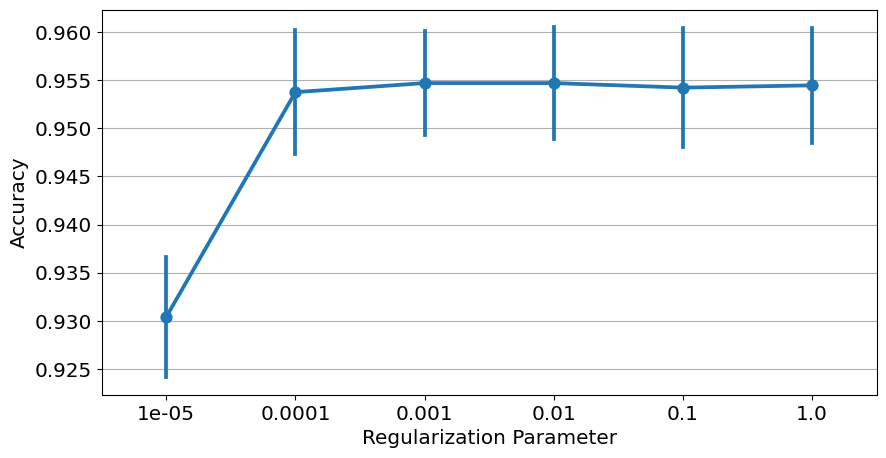

In [84]:
sns.pointplot(
    data=results,
    ci='sd'
)

xl = plt.xlabel('Regularization Parameter')
yl = plt.ylabel('Accuracy')

<div dir=rtl>
    בתרשים למעלה קיבלנו את הממוצע וסטיית התקן של חמש ריצות שונות של המודל על חמש חלוקות שונות של הדאטא.
    </br>
     רווח הסמך שבחרנו לבקש מהמודל להציג הוא הסטיית תקן. 
     </br>
     כעת נוכל לבחור פרמטר בצורה מושכלת ומוצדקת.
</div>

אפשר לחזור על התהליך עם מדדים ההמקיפים יותר (מאשר ה-אקיורסי הבעייתי)

אפשר גם לשלב את האנליזה של הטרייד-אוף בין השגיאות משני הסוגים  עם קרוס וולידציה,

לקבלת תמונה שלמה עוד יותר לגבי ביצועי המסווג בגרף אחד: 

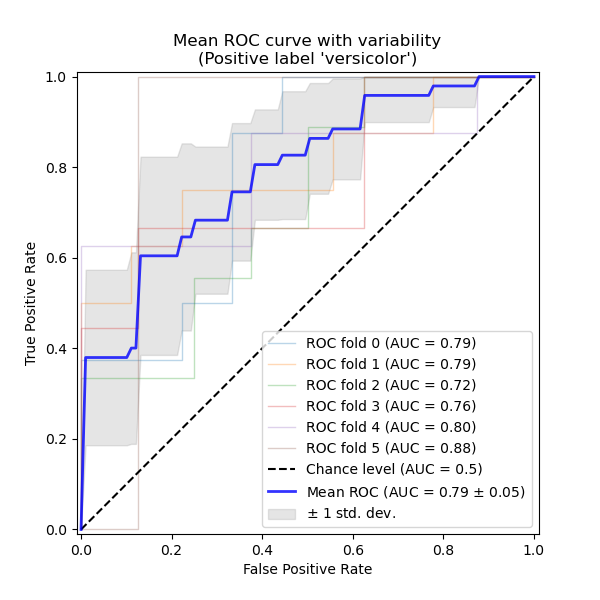


שאלה:  איך ניתן לצייר עקומת ספציפיות-רגישות עבור מסווג מסוג "מכונת וקטורי בסיס" שאינו פולט הסתברויות שניתן להשוות שסף שרץ בין 0 ל-1 ? איך ציירו את העקומות הנ"ל ?